In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
df = pd.read_csv('Advertising_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [17]:
df_x = df.iloc[:,1:-1]
df_y = df.iloc[:,-1:]

In [18]:
df_x = pd.get_dummies(df_x, drop_first = True)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_x = pd.DataFrame(scaler.fit_transform(df_x), columns = df_x.columns)

In [20]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [25]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('clf_forest', forest)])

In [26]:
params = [{'clf_forest': [forest], 'clf_forest__n_estimators': [20, 25, 30], 'clf_forest__max_features': [1, 2, 3]},
          {'clf_forest': [knn], 'clf_forest__n_neighbors': np.arange(1,5), 'clf_forest__p': np.arange(1,5)},
          {'clf_forest': [log_reg], 'clf_forest__C': np.arange(0.1,1.1,0.1)}]

In [42]:
randomized_search_cv = RandomizedSearchCV(estimator = pipe, param_distributions = params, scoring = 'accuracy', cv = 15, n_jobs = -1, n_iter = 25)

In [65]:
randomized_search_cv.fit(df_x, df_y)

AttributeError: 'list' object has no attribute 'values'

In [187]:
grid_search_cv.best_params_

{'clf_forest': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                      weights='uniform'),
 'clf_forest__n_neighbors': 3,
 'clf_forest__p': 1}

In [188]:
grid_search_cv.best_score_

0.8975

In [189]:
grid_search_cv.best_estimator_

Pipeline(memory=None,
         steps=[('clf_forest',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=1,
                                      weights='uniform'))],
         verbose=False)

In [190]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.02243981, 0.02882235, 0.03500619, 0.02602968, 0.03610339,
        0.0401921 , 0.0288224 , 0.03490596, 0.04567795, 0.00259323,
        0.00319195, 0.00249364, 0.00244999, 0.00269315, 0.00229449,
        0.00299211, 0.00239403, 0.00259314, 0.00229394, 0.00418909,
        0.00229442, 0.00358994, 0.00409057, 0.0030911 , 0.00329208,
        0.00687909, 0.00508647, 0.00608599, 0.00648019, 0.00648117,
        0.00488751, 0.00648425, 0.00508571, 0.00299356, 0.0025985 ]),
 'std_fit_time': array([0.00351909, 0.00254097, 0.00229395, 0.00340971, 0.00469464,
        0.00457115, 0.00642404, 0.004438  , 0.00937496, 0.00048892,
        0.00230875, 0.00049899, 0.00047109, 0.00118466, 0.00045683,
        0.00109256, 0.00048905, 0.00066144, 0.00045719, 0.00527365,
        0.00045703, 0.00127647, 0.00136957, 0.00069691, 0.0010006 ,
        0.00181075, 0.0010428 , 0.00407413, 0.00092488, 0.00264896,
        0.0018628 , 0.00128016, 0.00129662, 0.00063355, 0.00048173]),
 'mean_scor

In [197]:
knn = KNeighborsClassifier(n_neighbors = 3, p = 1)
knn.fit(x_train, y_train.values[:,0])
y_pred_knn = knn.predict(x_test)
forest = RandomForestClassifier(n_estimators = 25, max_features = 1)
forest.fit(x_train, y_train.values[:,0])
y_pred_forest = forest.predict(x_test)
log_reg = LogisticRegression(C = 0.1)
log_reg.fit(x_train, y_train.values[:,0])
y_pred_log_reg = log_reg.predict(x_test)

C:\Users\kpeddolla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [198]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
print('accuracy_scores')
print('knn', accuracy_score(y_test, y_pred_knn))
print('forest', accuracy_score(y_test, y_pred_forest))
print('log_reg', accuracy_score(y_test, y_pred_log_reg))

accuracy_scores
knn 0.9166666666666666
forest 0.8833333333333333
log_reg 0.8333333333333334


In [199]:
print('roc_auc_scores')
print('knn', roc_auc_score(y_test, y_pred_knn))
print('forest', roc_auc_score(y_test, y_pred_forest))
print('log_reg', roc_auc_score(y_test, y_pred_log_reg))

roc_auc_scores
knn 0.9036427732079906
forest 0.8642773207990598
log_reg 0.790834312573443


In [200]:
print('confusion_matrix')
print('knn')
print(confusion_matrix(y_test, y_pred_knn))
print('forest')
print(confusion_matrix(y_test, y_pred_forest))
print('log_reg')
print(confusion_matrix(y_test, y_pred_log_reg))

confusion_matrix
knn
[[71  3]
 [ 7 39]]
forest
[[70  4]
 [10 36]]
log_reg
[[72  2]
 [18 28]]


In [201]:
print('classification_report')
print('knn')
print(classification_report(y_test, y_pred_knn))
print('forest')
print(classification_report(y_test, y_pred_forest))
print('log_reg')
print(classification_report(y_test, y_pred_log_reg))

classification_report
knn
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        74
           1       0.93      0.85      0.89        46

    accuracy                           0.92       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120

forest
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        74
           1       0.90      0.78      0.84        46

    accuracy                           0.88       120
   macro avg       0.89      0.86      0.87       120
weighted avg       0.88      0.88      0.88       120

log_reg
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        74
           1       0.93      0.61      0.74        46

    accuracy                           0.83       120
   macro avg       0.87      0.79      0.81       120
weighted avg       0.85      0.83

In [202]:
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, y_pred_knn)
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_test, y_pred_forest)
fpr_log_reg, tpr_log_reg, threshold_log_reg = roc_curve(y_test, y_pred_log_reg)
print('fpt, tpr, thresholds')
print('knn     ', fpr_knn, tpr_knn, threshold_knn)
print('forest  ', fpr_forest, tpr_forest, threshold_forest)
print('log_reg ', fpr_log_reg, tpr_log_reg, threshold_log_reg)

fpt, tpr, thresholds
knn      [0.         0.04054054 1.        ] [0.         0.84782609 1.        ] [2 1 0]
forest   [0.         0.05405405 1.        ] [0.        0.7826087 1.       ] [2 1 0]
log_reg  [0.         0.02702703 1.        ] [0.         0.60869565 1.        ] [2 1 0]


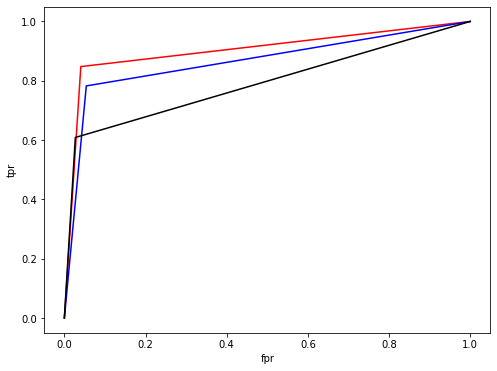

In [203]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_knn, tpr_knn, color = 'red')
plt.plot(fpr_forest, tpr_forest, color = 'blue')
plt.plot(fpr_log_reg, tpr_log_reg, color = 'black')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
#Hence we choose the knn model as it has the highest area under the curve